**The Notebook contains the code for Building Neural Network with the MNIST data**

- **Target of Book**: As the previous architecture ("Setup.ipynb") has large number of parameters(heavier model) and is been performing good with 99.9 accuracy, we could think of making the model lighter with lesser number of parameters. So, here the lighter model architecture is being designed to achieve an accuracy in between 99-99.2% including a bit of overfitting. 

* **Description**: 

1. The network architecture is built up on with basic functionalities without any usage of special features and functionalities. 
2. This network has been reduced to usage of lesser number of parameters (14282) ~ 14 thousand parameter, which makes it a lighter model. 
3. The Architecture only has Convolutions, Relu activation function, Max Pooling, and returning result with softmax, which returns a list of probabilites of classes.
4. The **Receptive Field looks out a 32x32** at the end.
5.  **EPOCHS**: Iterated the dataset for **20** times.
6. BATCHSIZE : 128 
7. Accuracies are mentioned in the "Results" section and "analysis" is made.

8. As per my view & visualizations, the model's accuracy has been great compared to previous architecture it starts with underfitted accuracies and regain the good accuracy score.


**A. Importing Libraries**

In [3]:
from __future__ import print_function
import torch 
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F 
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets,transforms

**B. Dataloader/ Loading the data**




In [2]:
# Defining transformations such that our data can be transformed in such a way 

train_transforms = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
test_transforms = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])

In [4]:
train = datasets.MNIST("./data",train=True,download=True,transform=train_transforms)
test = datasets.MNIST("./data",train=False,download=True,transform=test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



**C. Setting Configurations for processors & dataloading**

In [5]:
SEED = 1 
gpu = torch.cuda.is_available()
print("Is cuda available: ",gpu)
torch.manual_seed(SEED)

if gpu:
  torch.cuda.manual_seed(SEED)

dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if gpu else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

Is cuda available:  True


/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



**D. Visualization & understanding of Images**

torch.Size([128, 1, 28, 28]) torch.Size([128])


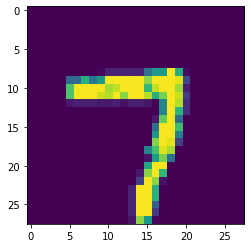

In [6]:
images,labels = next(iter(train_loader))
print(images.shape,labels.shape)
plt.imshow(images[10].numpy().squeeze())

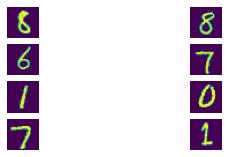

In [7]:
figure = plt.figure() 
for idx in range(1,9):
  plt.subplot(6,2,idx)
  plt.axis('off')
  plt.imshow(images[idx].numpy().squeeze())

**E. Building Model Architecture**

In [33]:
## creating Neural Network Architecture

class Setup(nn.Module):
  def __init__(self):
    super(Setup,self).__init__()

    self.convblock1 = nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=8,kernel_size=(3,3),padding=1), 
        nn.ReLU())

    self.convblock2 = nn.Sequential(
        nn.Conv2d(in_channels=8,out_channels=16,kernel_size=(3,3),padding=1),
        nn.ReLU()) 
   
    self.convblock3 = nn.Sequential(
        nn.Conv2d(in_channels=16,out_channels=32,kernel_size=(3,3)),
        nn.ReLU()
    )
    
    self.pool1 = nn.MaxPool2d(2,2)
    
    self.convblock4 = nn.Sequential(
        nn.Conv2d(in_channels=32,out_channels=16,kernel_size=(3,3)),
        nn.ReLU()
    )

    self.convblock5 = nn.Sequential(
        nn.Conv2d(in_channels=16,out_channels=16,kernel_size=(3,3)),
        nn.ReLU()
    )
    
    self.convblock6 = nn.Sequential(
       nn.Conv2d(in_channels=16,out_channels=10,kernel_size=(3,3)))


    self.pool1 = nn.MaxPool2d(2,2)

  def forward(self,x):
    x = self.convblock1(x)
    x = self.convblock2(x)
    x = self.pool1(x)
    x = self.convblock3(x)
    x = self.convblock4(x)
    x = self.pool1(x)
    x = self.convblock5(x)
    x = self.convblock6(x)
    x = x.view(-1,10)
    return F.log_softmax(x,dim=-1)

**F.Understanding the summary of Architecture**

In [34]:
# !pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Setup().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
              ReLU-2            [-1, 8, 28, 28]               0
            Conv2d-3           [-1, 16, 28, 28]           1,168
              ReLU-4           [-1, 16, 28, 28]               0
         MaxPool2d-5           [-1, 16, 14, 14]               0
            Conv2d-6           [-1, 32, 12, 12]           4,640
              ReLU-7           [-1, 32, 12, 12]               0
            Conv2d-8           [-1, 16, 10, 10]           4,624
              ReLU-9           [-1, 16, 10, 10]               0
        MaxPool2d-10             [-1, 16, 5, 5]               0
           Conv2d-11             [-1, 16, 3, 3]           2,320
             ReLU-12             [-1, 16, 3, 3]               0
           Conv2d-13             [-1, 10, 1, 1]           1,450
Total params: 14,282
Trainable par

### Model Design: 

1. Block1: Image = (28,28) with padding makes Image = (30,30)  
           Parameters = (3*3*1+1)*8 = 8*10 = 80 
           Output Image = (28,28) 
           Receptive Field = (3,3) 
2. Block2: Image = Block1 ouptut Image (28,28) with padding makes Image = (30,30)
           Paramters = (3*3*8+1)*16 = 73*16 = 1168 
           OutputImage = (28,28) 
           Receptive Field = (5,5)
**Pooling Layer**:
           Output Image = (14,14)
           Receptive Field = (10,10)

3. Block3: Image = Block2 ouptut Image (14,14) 
           Paramters = (3*3*16+1)*32 = 145*32 = 4640
           OutputImage = (12,12) 
           Receptive Field = (12,12)

4. Block4: Image = Block3 ouptut Image (12,12) 
           Paramters = (3*3*32+1)*16 = 289*16 = 4624
           OutputImage = (10,10)
           Receptive Field = (14,14)
**Pooling Layer**:
           Output Image = (5,5)
           Receptive Field = (28,28)

5. Block5: Image = Block4 ouptut Image (5,5) 
           Paramters = (3*3*16+1)*16 = 145*16 = 2320
           OutputImage = (3,3)
           Receptive Field = (30,30)

6. Block6: Image = Block5 ouptut Image (3,3) 
           Paramters = (3*3*16+1)*10 = 145 = 1450
           OutputImage = (3,3) 
           Receptive Field = (32,32)


**G. Defining & deriving the training & its results as well as test/validation results**

In [35]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples

    data, target = data.to(device), target.to(device)
  
    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} train-Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, val-Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [36]:
model =  Setup().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.13927830755710602 Batch_id=468 train-Accuracy=69.62: 100%|██████████| 469/469 [00:15<00:00, 30.99it/s] 



Test set: Average loss: 0.0984, val-Accuracy: 9711/10000 (97.11%)

EPOCH: 1


Loss=0.03251815214753151 Batch_id=468 train-Accuracy=97.24: 100%|██████████| 469/469 [00:15<00:00, 31.18it/s] 



Test set: Average loss: 0.0524, val-Accuracy: 9827/10000 (98.27%)

EPOCH: 2


Loss=0.038759198039770126 Batch_id=468 train-Accuracy=97.99: 100%|██████████| 469/469 [00:15<00:00, 30.46it/s] 



Test set: Average loss: 0.0440, val-Accuracy: 9853/10000 (98.53%)

EPOCH: 3


Loss=0.024621548131108284 Batch_id=468 train-Accuracy=98.46: 100%|██████████| 469/469 [00:15<00:00, 31.21it/s]



Test set: Average loss: 0.0351, val-Accuracy: 9882/10000 (98.82%)

EPOCH: 4


Loss=0.04040474817156792 Batch_id=468 train-Accuracy=98.66: 100%|██████████| 469/469 [00:15<00:00, 29.97it/s]  



Test set: Average loss: 0.0519, val-Accuracy: 9836/10000 (98.36%)

EPOCH: 5


Loss=0.013631368987262249 Batch_id=468 train-Accuracy=98.78: 100%|██████████| 469/469 [00:15<00:00, 31.20it/s] 



Test set: Average loss: 0.0356, val-Accuracy: 9879/10000 (98.79%)

EPOCH: 6


Loss=0.0031856782734394073 Batch_id=468 train-Accuracy=98.94: 100%|██████████| 469/469 [00:15<00:00, 30.37it/s]



Test set: Average loss: 0.0382, val-Accuracy: 9871/10000 (98.71%)

EPOCH: 7


Loss=0.027354896068572998 Batch_id=468 train-Accuracy=99.03: 100%|██████████| 469/469 [00:15<00:00, 30.09it/s] 



Test set: Average loss: 0.0324, val-Accuracy: 9896/10000 (98.96%)

EPOCH: 8


Loss=0.017228005453944206 Batch_id=468 train-Accuracy=99.08: 100%|██████████| 469/469 [00:14<00:00, 31.63it/s] 



Test set: Average loss: 0.0332, val-Accuracy: 9884/10000 (98.84%)

EPOCH: 9


Loss=0.017246121540665627 Batch_id=468 train-Accuracy=99.17: 100%|██████████| 469/469 [00:15<00:00, 29.84it/s] 



Test set: Average loss: 0.0322, val-Accuracy: 9889/10000 (98.89%)

EPOCH: 10


Loss=0.030195003375411034 Batch_id=468 train-Accuracy=99.23: 100%|██████████| 469/469 [00:14<00:00, 31.59it/s] 



Test set: Average loss: 0.0317, val-Accuracy: 9892/10000 (98.92%)

EPOCH: 11


Loss=0.0049262866377830505 Batch_id=468 train-Accuracy=99.29: 100%|██████████| 469/469 [00:15<00:00, 29.92it/s]



Test set: Average loss: 0.0300, val-Accuracy: 9897/10000 (98.97%)

EPOCH: 12


Loss=0.015942757949233055 Batch_id=468 train-Accuracy=99.40: 100%|██████████| 469/469 [00:15<00:00, 30.61it/s] 



Test set: Average loss: 0.0359, val-Accuracy: 9892/10000 (98.92%)

EPOCH: 13


Loss=0.014472330920398235 Batch_id=468 train-Accuracy=99.42: 100%|██████████| 469/469 [00:15<00:00, 30.38it/s]  



Test set: Average loss: 0.0289, val-Accuracy: 9905/10000 (99.05%)

EPOCH: 14


Loss=0.00793019775301218 Batch_id=468 train-Accuracy=99.47: 100%|██████████| 469/469 [00:15<00:00, 29.87it/s]   



Test set: Average loss: 0.0304, val-Accuracy: 9907/10000 (99.07%)

EPOCH: 15


Loss=0.009829922579228878 Batch_id=468 train-Accuracy=99.53: 100%|██████████| 469/469 [00:14<00:00, 31.69it/s]  



Test set: Average loss: 0.0304, val-Accuracy: 9911/10000 (99.11%)

EPOCH: 16


Loss=0.004064970184117556 Batch_id=468 train-Accuracy=99.53: 100%|██████████| 469/469 [00:15<00:00, 30.06it/s]  



Test set: Average loss: 0.0329, val-Accuracy: 9902/10000 (99.02%)

EPOCH: 17


Loss=0.00616089254617691 Batch_id=468 train-Accuracy=99.57: 100%|██████████| 469/469 [00:15<00:00, 30.37it/s]   



Test set: Average loss: 0.0301, val-Accuracy: 9912/10000 (99.12%)

EPOCH: 18


Loss=0.002448599087074399 Batch_id=468 train-Accuracy=99.59: 100%|██████████| 469/469 [00:15<00:00, 30.20it/s]  



Test set: Average loss: 0.0280, val-Accuracy: 9910/10000 (99.10%)

EPOCH: 19


Loss=0.0007740575238130987 Batch_id=468 train-Accuracy=99.62: 100%|██████████| 469/469 [00:15<00:00, 30.47it/s] 



Test set: Average loss: 0.0392, val-Accuracy: 9889/10000 (98.89%)



Text(0.5, 1.0, 'Test Accuracy')

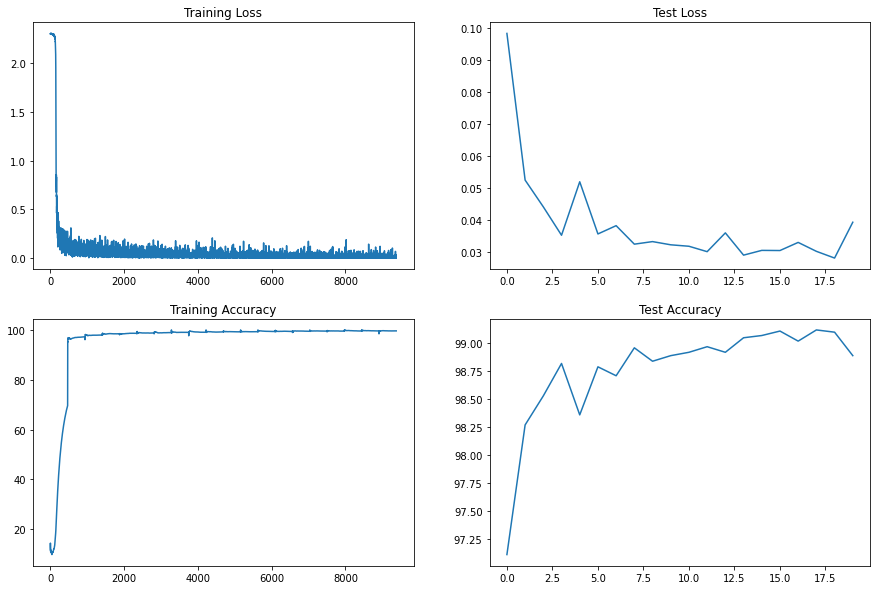

In [37]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([t.cpu().item() for t in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

# 2. Results:

**Note: The best & highest accuracies aren't written here, but the ones with less provoke to overfitting.**

Top Accuracies: 

* Train    Test 

  99.03    98.86 
  
  99.17    98.89 
  
  99.29    98.97 
  
  99.42    99.05 
  
  99.53    99.11
  

# 3. Analysis:

1. Here, the model right from first epoch started with underfitting        towards test data and by epoch-by-epoch it increased its training      accuracy and provided the good results at end.
2. Here, model has achieved what was desired upfront, its a lighter   model where we has to add some features to make it more robuts 
2. As we saw in "Setup.ipynb" book, there is a dip & again back to        higher accuracy has happened, but here we tried to resolve it as the    accuracies & loss of training & test tend to follow the decrement of    loss.
3. Here, the models parameters has been reduced to 90% as compared to    'Setup.ipynb'.
4. We can still find the accuracies in the logs where over-fitting has happened atmost of times, we have to deal with it at the earliest with the help of features such as regularization techniques or using batch normalization or performing augmentation or using GAP or may be combination of multiple mentioned functionalities.

In [40]:
!pip install colorama

In [45]:
from colorama import init,Fore, Back, Style 

print(Style.BRIGHT+Fore.BLACK +"Lets try to reduce over-fitting make the model to product robust accuracies")

Lets try to reduce over-fitting make the model to product robust accuracies


In [39]:
print("Done!")

Done!
